In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

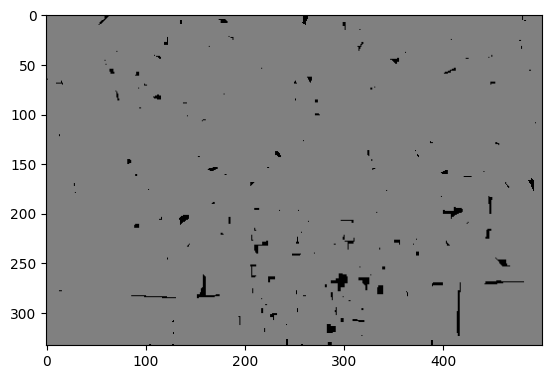

In [6]:
def generate_trimap_improved(image):
  """
  Generates a trimap image using adaptive thresholding and edge detection.

  Args:
      image: The input image (BGR format).

  Returns:
      A trimap image with foreground (255), background (0), and unknown (128) regions.
  """

  # Convert to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Adaptive thresholding
  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

  # Edge detection with Canny
  edges = cv2.Canny(thresh, 100, 200)

  # Combine edges with thresholded mask
  mask = cv2.bitwise_or(thresh, edges)

  # Erode and dilate (adjust as needed)
  kernel = np.ones((3, 3), np.uint8)
  mask = cv2.erode(mask, kernel, iterations=1)
  kernel = np.ones((5, 5), np.uint8)
  unknown = cv2.dilate(mask, kernel, iterations=2)

  # Combine foreground, background, and unknown regions into trimap
  trimap = np.zeros_like(image)
  trimap[mask == 255] = 255  # Foreground
  trimap[unknown == 255] = 128  # Unknown
  return trimap

# Example usage
name = "plant.jpg"
image = cv2.imread(name)
trimap = generate_trimap_improved(image)
plt.imshow(trimap)
# cv2.imshow("Trimap", trimap)
# cv2.waitKey(0)
# cv2.destroyAllWindows()